In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [52]:
import statsmodels.tsa.arima.model as smt

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
from pmdarima import auto_arima

In [30]:
cd ..

/home/dhatri


In [31]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [32]:
df1 = pd.read_csv('TradeInventories.csv', index_col='Date', parse_dates=True)
df1.index.freq = 'MS'
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'
df2 = df2[:120] #grabbing only the first 4 months

# ARMA

<Axes: xlabel='Date'>

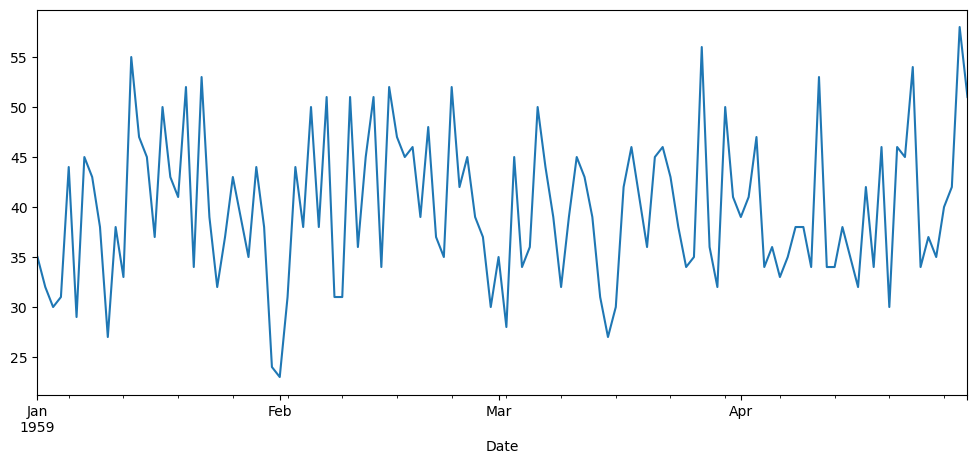

In [33]:
df2['Births'].plot()

In [36]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['Births'], autolag='AIC')[1]

In [37]:
result

4.3735454059910584e-17

In [39]:
# since it muchhhh lessar than 0.05 it is stationary/

In [42]:
model = auto_arima(df2['Births'], seasonal=False)

In [43]:
model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [44]:
# now that we know which model t0 use, we will now begin
# splitiing our dataset into train and test

In [47]:
train = df2.iloc[:90]
test = df2.iloc[90:]

In [57]:
model = smt.ARIMA(df2['Births'], order=(2, 0, 2))

In [58]:
result = model.fit()

In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  120
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -405.538
Date:                Sun, 09 Jun 2024   AIC                            823.076
Time:                        20:54:02   BIC                            839.801
Sample:                    01-01-1959   HQIC                           829.868
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7887      0.728     54.660      0.000      38.362      41.215
ar.L1          1.2600      0.018     68.661      0.000       1.224       1.296
ar.L2         -0.9933      0.017    -59.889      0.000      -1.026      -0.961
ma.L1         -1.2248      0.087    -14.135      0.000      -1.395      -1.055
ma.L2          0.9871      0.139      7.103      0.000       0.715       1.259
sigma2        49.0807      9.980      4.918      0.000      29.521      68.641
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.62
Prob(Q):                              0.97   Prob(JB):                         0.06
Heteroskedasticity (H):               0.94   Skew:                             0.45
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start = len(train)
end = len(train) + len(test) - 1

In [63]:
pred = result.predict(start, end).rename('ARMA (2,0,2) Predictions')

In [64]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [65]:
pred

Date
1959-04-01    41.771649
1959-04-02    42.216358
1959-04-03    40.870037
1959-04-04    39.005815
1959-04-05    37.436409
1959-04-06    37.617826
1959-04-07    39.224993
1959-04-08    41.131044
1959-04-09    41.975021
1959-04-10    41.095271
1959-04-11    39.035055
1959-04-12    38.193354
1959-04-13    38.170897
1959-04-14    39.225871
1959-04-15    40.693703
1959-04-16    41.280268
1959-04-17    40.478400
1959-04-18    39.356177
1959-04-19    38.329045
1959-04-20    38.747831
1959-04-21    39.487918
1959-04-22    40.807989
1959-04-23    41.453209
1959-04-24    41.309963
1959-04-25    39.614245
1959-04-26    38.045934
1959-04-27    37.679963
1959-04-28    38.989053
1959-04-29    40.964477
1959-04-30    42.684736
Freq: D, Name: ARMA (2,0,2) Predictions, dtype: float64

<Axes: xlabel='Date'>

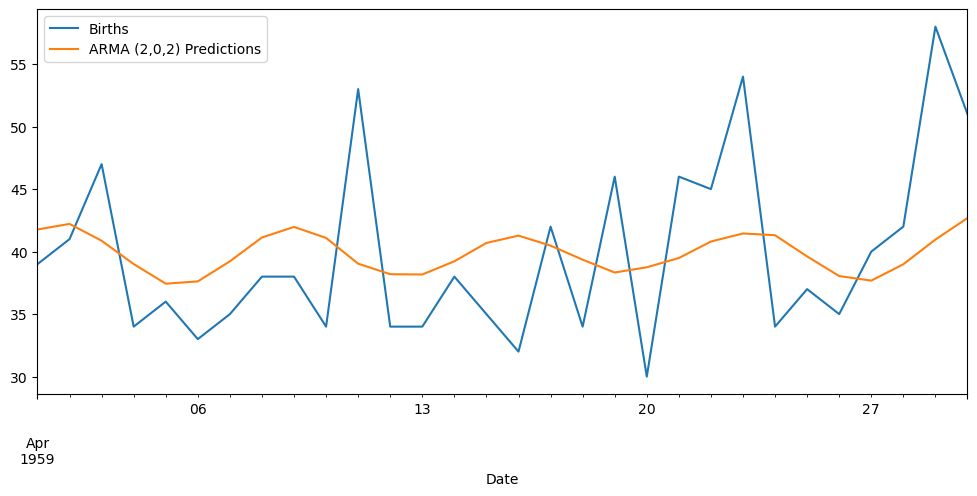

In [66]:
test['Births'].plot(legend=True)
pred.plot(legend=True)

<Axes: xlabel='Date'>

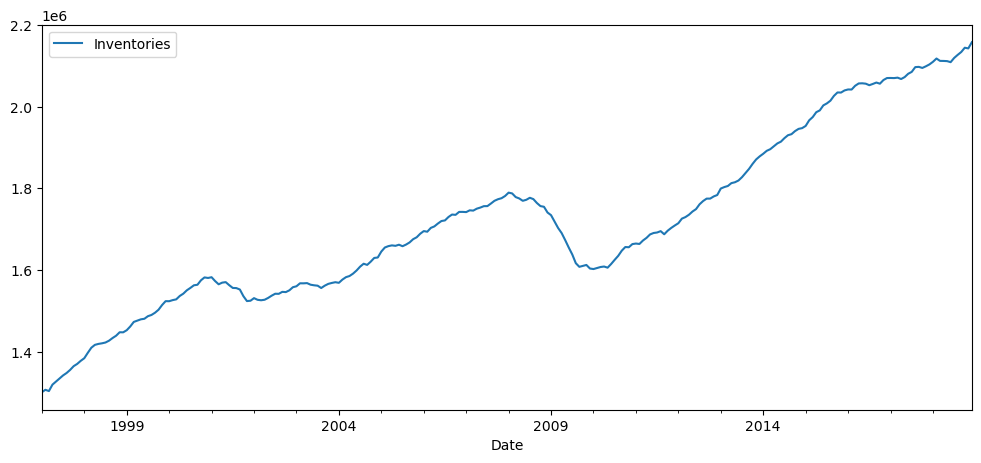

In [67]:
df1.plot()

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

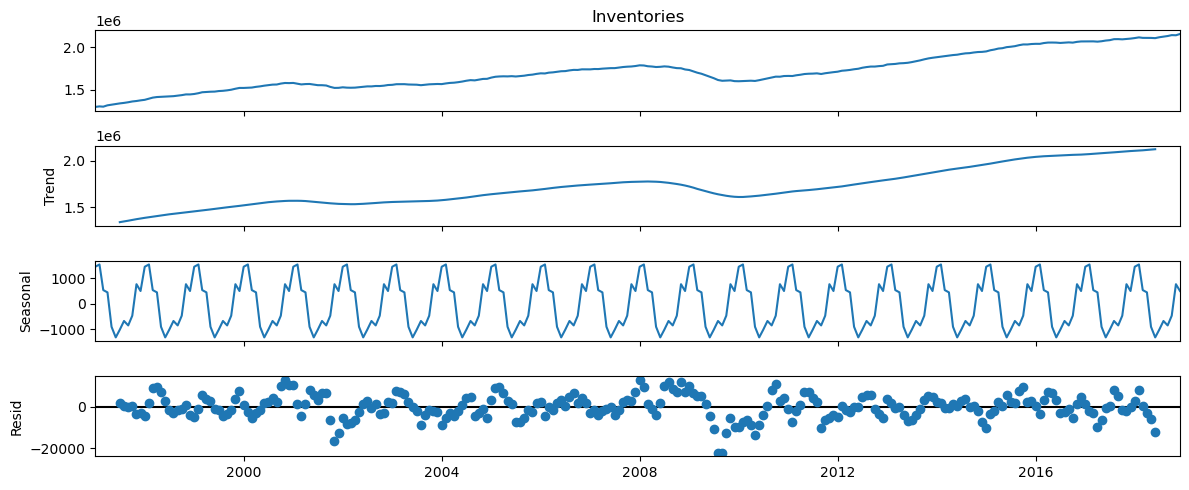

In [71]:
seasonal_decompose(df1['Inventories'], model='add').plot();

In [72]:
auto_arima(df1['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 09 Jun 2024   AIC                           5348.037
Time:                        21:03:14   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
from statsmodels.tsa.statespace.tools import diff

In [75]:
df2['Diff_1'] = diff(df1['Inventories'])

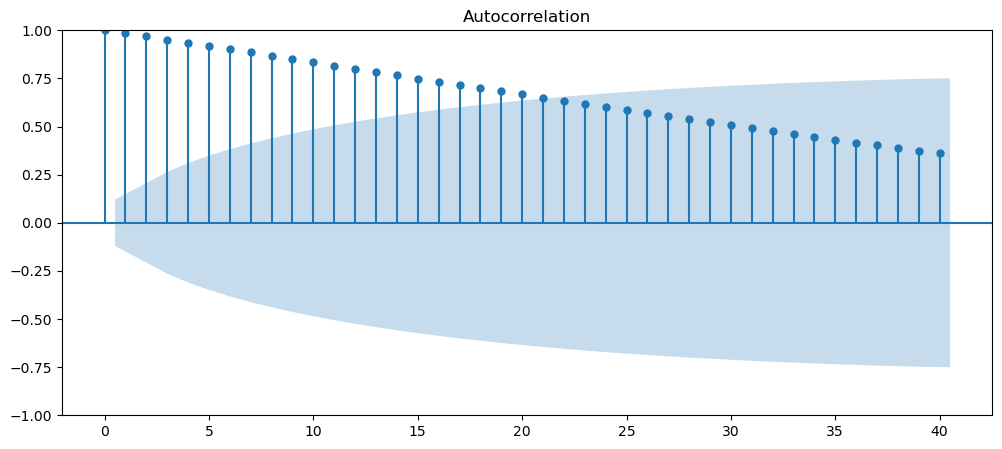

In [77]:
plot_acf(df1['Inventories'], lags=40);

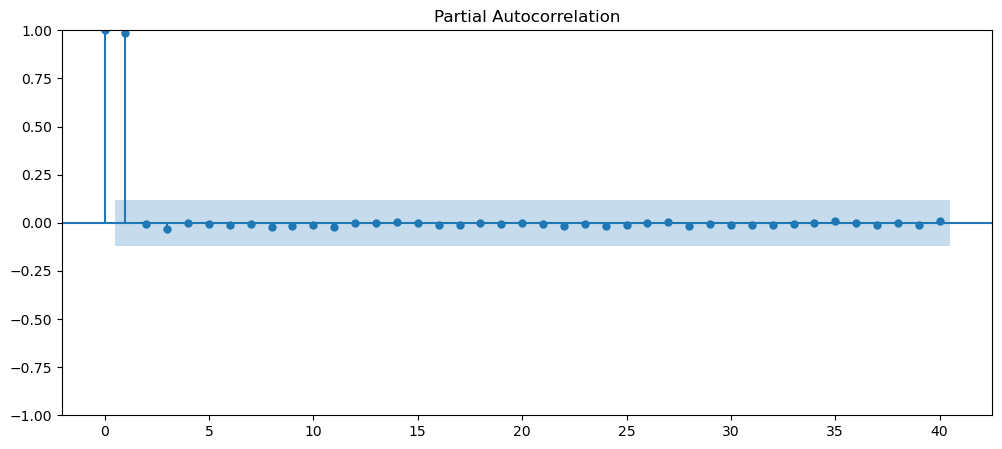

In [78]:
plot_pacf(df1['Inventories'], lags=40);

In [80]:
stepwise_fit = auto_arima(df1['Inventories'], start_p=0, start_q=0, max_p=2, max_q=2, seasonal=False, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.166 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 09 Jun 2024   AIC                           5348.037
Time:                        21:14:22   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
train = df1.iloc[:252]
test = df1.iloc[252:]
model = smt.ARIMA(train['Inventories'], order=(1,1,1)).fit()
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start, end, typ='levels').rename('ARIMA(0,1,0) Predictions')

<Axes: xlabel='Date'>

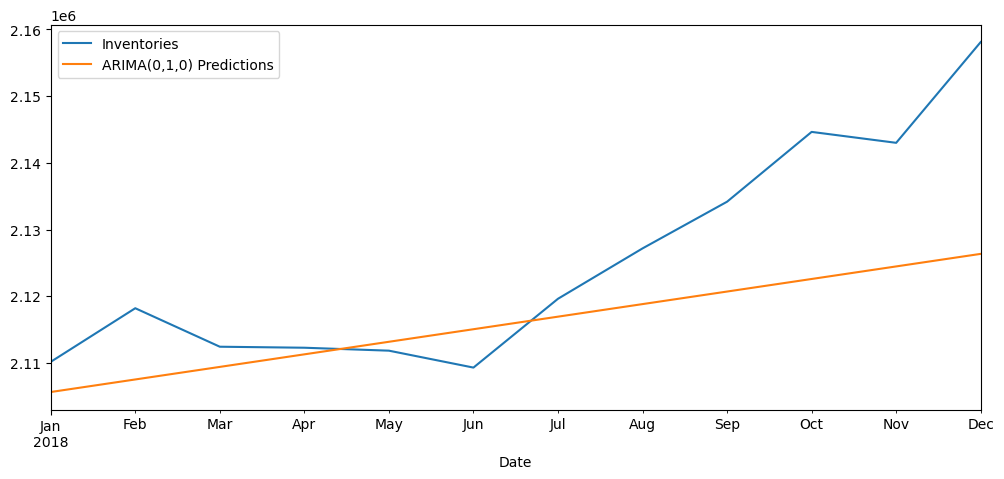

In [92]:
test['Inventories'].plot(legend=True)
pred.plot(legend=True)

In [93]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['Inventories'], pred)
error

13774.505904221689

In [96]:
fcast = model.predict(start=len(df1), end=len(df1) + 111, typ='levels').rename('ARIMA (1, 1, 1) Forecast')

<Axes: xlabel='Date'>

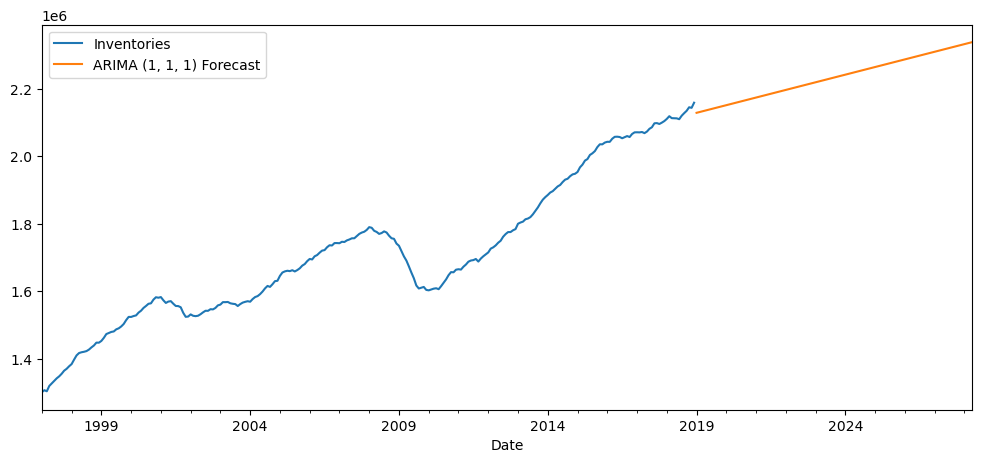

In [97]:
df1['Inventories'].plot(legend=True)
fcast.plot(legend=True)